In [201]:
import pandas as pd
import numpy as np

df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [202]:
df = df.drop(df.iloc[:,:1],axis='columns')

In [203]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [204]:
X = df[['Height']]
X

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [205]:
y = df.Weight
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

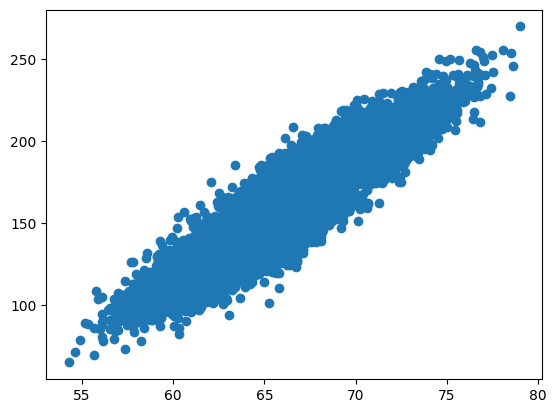

In [206]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [207]:
class LinearRegression:
    def __init__(self,lr=0.0001,n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self,X):
        y_pred = np.dot(X,self.weights) + self.bias
        return y_pred

In [208]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

In [209]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

569.957003008658


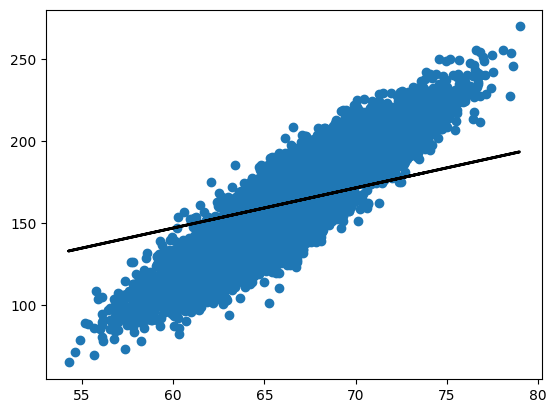

In [210]:
y_pred_line = model.predict(X)
plt.scatter(X,y)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()